In [1]:
import nibabel as nib
import numpy as np
import cv2
import os
import scipy
import sklearn
import matplotlib.pyplot as plt
import torch
import re
import torchvision
from sklearn.cluster import KMeans
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from skimage import data, exposure, img_as_float

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

from skimage import exposure, io, util
from skimage import color, morphology
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter
from skimage.segmentation import flood, flood_fill
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import plotly
import plotly.express as px

In [52]:
imgs_list= []
path_frames = "./oblong_gel_ddw_sub"
file_name = "oblong_gel_ddw_sub_"
for idx , frame in enumerate(os.listdir(path_frames)):
  frame = Image.open(f'{path_frames}/{file_name}{idx}.tif')
  frame = np.array(frame)
  imgs_list.append(frame)
cell_tunnels = np.array(imgs_list[::2])
cell_caseing = np.array(imgs_list[1::2])
shape = np.shape(cell_tunnels)
data = np.zeros((shape[0], 2, shape[1], shape[2]))
data[:,0,:,:] = cell_caseing;
data[:,1,:,:] = cell_tunnels;

In [55]:
fig = px.imshow(data, facet_col=1, animation_frame=0)
fig.layout.annotations[0]['text'] = 'Cell membranes'
fig.layout.annotations[1]['text'] = 'Nuclei'
plotly.io.show(fig)

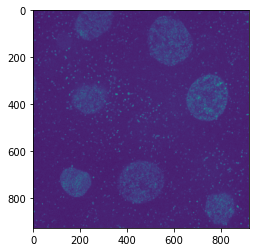

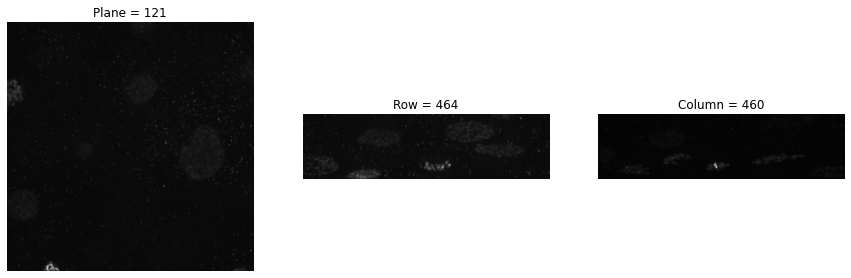

In [4]:
plt.imshow(cell_caseing[2])

def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)
        
data = cell_caseing
(n_plane, n_row, n_col) = data.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, data[n_plane // 2], title=f'Plane = {n_plane // 2}')
show_plane(b, data[:, n_row // 2, :], title=f'Row = {n_row // 2}')
show_plane(c, data[:, :, n_col // 2], title=f'Column = {n_col // 2}')

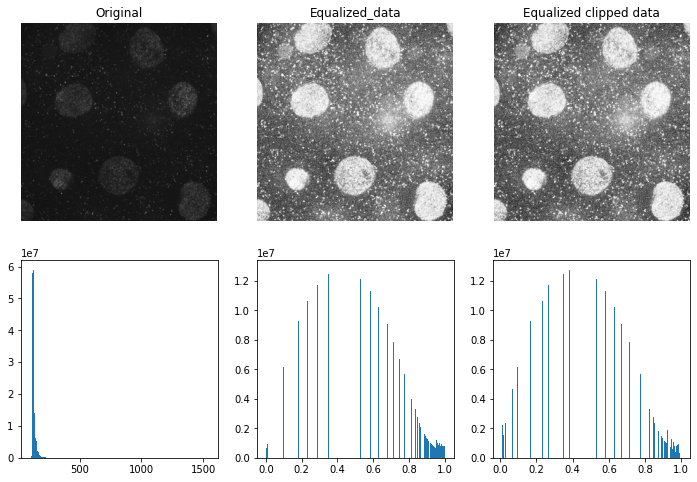

In [5]:
def plot_hist(ax, data, title=None):
    # Helper function for plotting histograms
    ax.hist(data.ravel(), bins=256)
    ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))

    if title:
        ax.set_title(title)

vmin, vmax = np.percentile(data, q=(1, 99))

clipped_data = exposure.rescale_intensity(
    data,
    in_range=(vmin, vmax),
    out_range=np.float32
)

equalized_data = exposure.equalize_hist(data)

equalized_clipped_data = exposure.equalize_hist(clipped_data)

_, ((a, b, c), (d, e, f)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

show_plane(a, data[32], title='Original')
show_plane(b, equalized_data[32], title=f'Equalized_data')
show_plane(c, equalized_clipped_data[32], title=f'Equalized clipped data')

plot_hist(d, data)
plot_hist(e, equalized_data)
plot_hist(f, equalized_clipped_data)

In [14]:
img_mask = equalized_clipped_data[32] > np.percentile(equalized_clipped_data[32],75)
mask_flood = flood(img_mask, (1, 1))

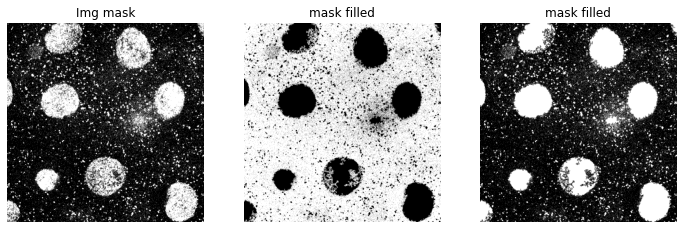

In [19]:
_, (a ,b, c) = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

show_plane(a, img_mask, title='Img mask')
show_plane(b, mask_flood, title='mask filled')
show_plane(c, ~mask_flood, title='mask filled')

In [20]:
img_mask = equalized_clipped_data > np.percentile(equalized_clipped_data[32],75)
filled_checkers = ~flood(img_mask, (1, 1, 1))

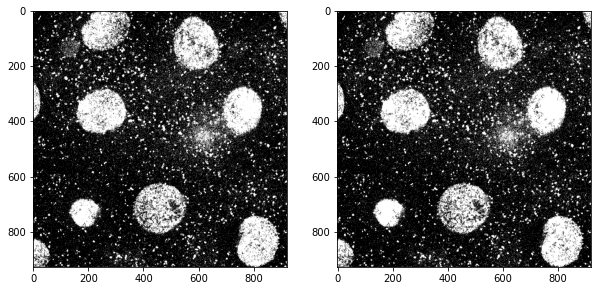

In [21]:

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img_mask[32], cmap=plt.cm.gray)

ax[1].imshow(filled_checkers[32], cmap=plt.cm.gray)


In [33]:
x,y,z = filled_checkers > 0.5

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

ValueError: too many values to unpack (expected 3)

In [36]:
fig = px.imshow(filled_checkers, facet_col=1, animation_frame=0)
fig.layout.annotations[0]['text'] = 'Cell membranes'
fig.layout.annotations[1]['text'] = 'Nuclei'
plotly.io.show(fig)

ValueError: px.imshow only accepts 2D single-channel, RGB or RGBA images. An image of shape (243, 928, 920) was provided. Alternatively, 3- or 4-D single or multichannel datasets can be visualized using the `facet_col` or/and `animation_frame` arguments.